### Feature Information
id: unique identifier

gender: "Male", "Female" or "Other"

age: age of the patient

hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

ever_married: "No" or "Yes"

work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

Residence_type: "Rural" or "Urban"

avg_glucose_level: average glucose level in blood

bmi: body mass index

smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

stroke: 1 if the patient had a stroke or 0 if not

### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the dataset

In [2]:
train_df=pd.read_csv("C:\\Users\\2211444\\Desktop\\kaggle\\playground-series-s3e2\\train.csv")
test_df=pd.read_csv("C:\\Users\\2211444\\Desktop\\kaggle\\playground-series-s3e2\\test.csv")
original_df= pd.read_csv("C:\\Users\\2211444\\Desktop\\kaggle\\playground-series-s3e2\\healthcare-dataset-stroke-data.csv")


In [3]:
train_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [4]:
original_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Merging data with original data
Well both of the data are similar one is original one sythetic, let's merge this data with our competition(synthic) data. It is called Data Augmentation, increasing the training data will help train the model better, the more the data, the better.

In [5]:
df = pd.concat([train_df, original_df]).reset_index(drop=True)

In [6]:
print("shape of training data before merging:", train_df.shape)
print("shape of training data after merging:",df.shape)

shape of training data before merging: (15304, 12)
shape of training data after merging: (20414, 12)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20414 entries, 0 to 20413
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 20414 non-null  int64  
 1   gender             20414 non-null  object 
 2   age                20414 non-null  float64
 3   hypertension       20414 non-null  int64  
 4   heart_disease      20414 non-null  int64  
 5   ever_married       20414 non-null  object 
 6   work_type          20414 non-null  object 
 7   Residence_type     20414 non-null  object 
 8   avg_glucose_level  20414 non-null  float64
 9   bmi                20213 non-null  float64
 10  smoking_status     20414 non-null  object 
 11  stroke             20414 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.9+ MB


In [8]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,20414.000000,20414.000000,20414.000000,20414.000000,20414.000000,20213.000000,20414.000000
mean,14877.273636,41.870510,0.061673,0.031008,93.322256,28.302280,0.043157
std,16825.306948,21.756482,0.240567,0.173344,32.476351,7.021765,0.203215
min,0.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,4766.250000,25.000000,0.000000,0.000000,75.220000,23.500000,0.000000
50%,9511.500000,43.000000,0.000000,0.000000,86.250000,27.700000,0.000000
75%,14279.750000,58.000000,0.000000,0.000000,99.730000,32.200000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [9]:
df=df.drop(['id'],axis=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20414 entries, 0 to 20413
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             20414 non-null  object 
 1   age                20414 non-null  float64
 2   hypertension       20414 non-null  int64  
 3   heart_disease      20414 non-null  int64  
 4   ever_married       20414 non-null  object 
 5   work_type          20414 non-null  object 
 6   Residence_type     20414 non-null  object 
 7   avg_glucose_level  20414 non-null  float64
 8   bmi                20213 non-null  float64
 9   smoking_status     20414 non-null  object 
 10  stroke             20414 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 1.7+ MB


In [11]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [12]:
cat_cols =  ["gender", "hypertension", "heart_disease", "ever_married", "work_type", "Residence_type", "smoking_status"]
num_cols = ['age','avg_glucose_level','bmi']

### EDA

#### Performing Univariate Analysis

In [13]:
df.nunique()

gender                  3
age                   106
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    4644
bmi                   440
smoking_status          4
stroke                  2
dtype: int64

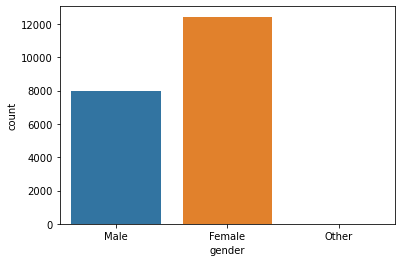

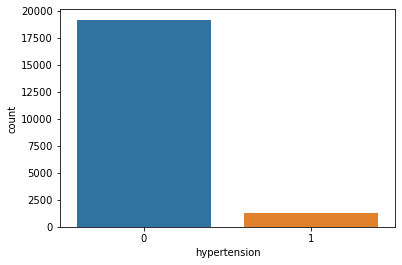

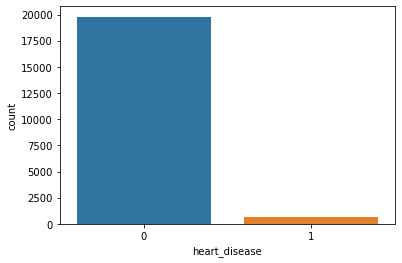

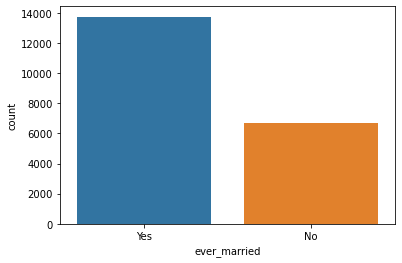

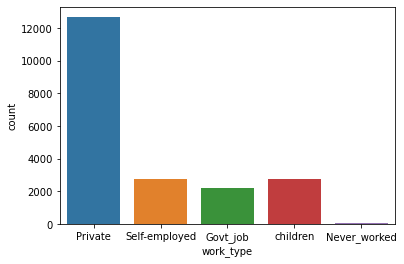

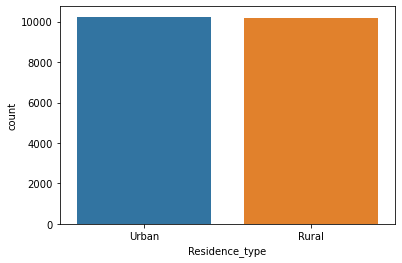

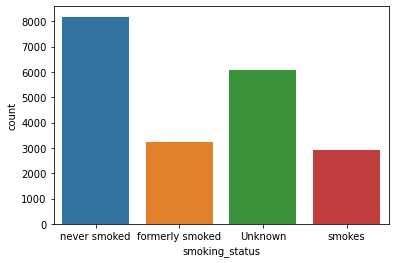

In [14]:
for i in cat_cols:
    sns.countplot(x=i,data=df)
    plt.show()

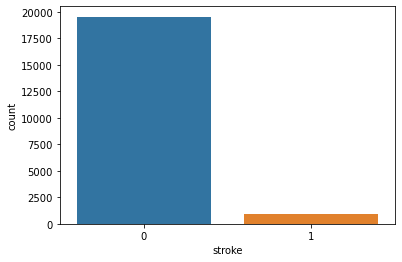

In [15]:
sns.countplot(x="stroke",data=df)

We see that our data is imbalanced.

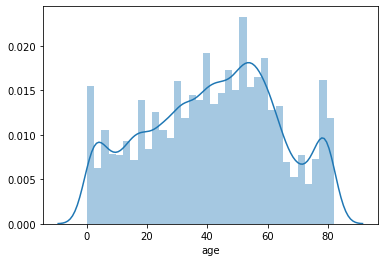

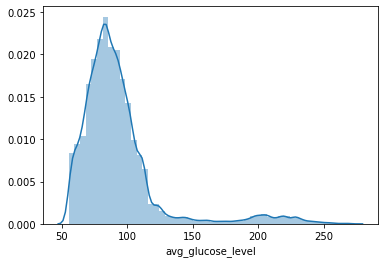

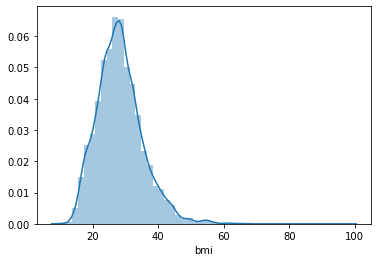

In [16]:
for i in num_cols:
    sns.distplot(a=df[i],kde=True)
    plt.show()

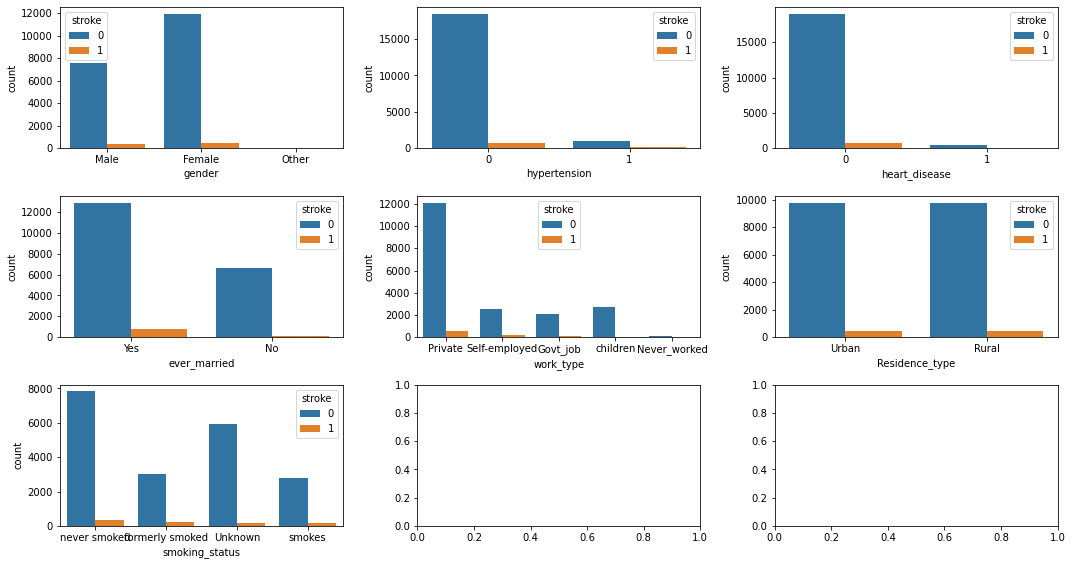

In [17]:
# plots between categoical features and target
ncols =3
cat_cols =  ["gender", "hypertension", "heart_disease", "ever_married", "work_type", "Residence_type", "smoking_status"]

fig,ax = plt.subplots(3, 3,figsize=(15, 8))

for idx, feature in enumerate(cat_cols):
    row = idx//ncols
    col = idx% ncols
    sns.countplot(data=df, x=feature, hue='stroke',ax =ax[row,col])
    
plt.tight_layout()

Interestingly,the ratio of getting stroke is same whether patient is from rural and urban.
Patients who ever-married,are getting more strokes than non-married.
Ration of getting stroke or not is same for Private and self-employed people.
If patient is non-smoker, he or she have less chance of getting stroke and their ratio from barely smoker is almost same.

In [18]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='median')
df['bmi'] = imp.fit_transform(df[["bmi"]])  
enc_col =["gender", "work_type",'ever_married',"Residence_type","smoking_status"]
enc = OrdinalEncoder()
df[enc_col] = enc.fit_transform(df[enc_col])

### Bivariate Analysis

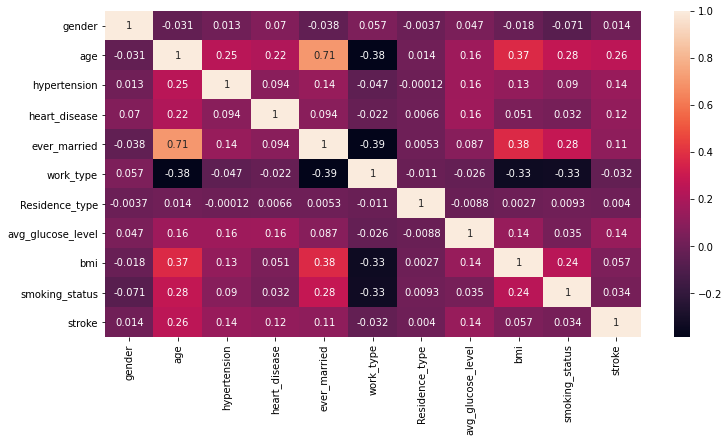

In [19]:
plt.figure(figsize=(12,6))
sns.heatmap(data = df.corr(),annot=True,fmt=".2g")

* Age and Worktype have strong negatinve correlation.
* Worktype and bmi have fairly good negative correlation

### Age Vs. Heart_disease, Work_type, Hypertension

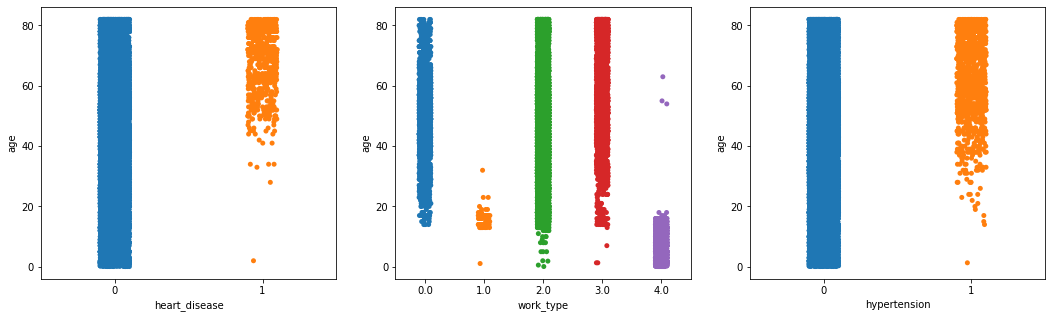

In [20]:
plt.figure(figsize=(18, 5))
plt.subplot(1, 3,1)
sns.stripplot(data=df,x='heart_disease',y='age')
plt.subplot(1, 3,2)
sns.stripplot(data=df,x='work_type',y='age')
plt.subplot(1, 3,3)
sns.stripplot(data=df,x='hypertension',y='age')

* Almost all heart disease people are above 50, which is obvious.
* Hypertesion disease in people of above 50.


In [21]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,28.0,0,0,1.0,2.0,1.0,79.53,31.1,2.0,0
1,1.0,33.0,0,0,1.0,2.0,0.0,78.44,23.9,1.0,0
2,0.0,42.0,0,0,1.0,2.0,0.0,103.00,40.3,0.0,0
3,1.0,56.0,0,0,1.0,2.0,1.0,64.87,28.8,2.0,0
4,0.0,24.0,0,0,0.0,2.0,0.0,73.36,28.8,2.0,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20414 entries, 0 to 20413
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             20414 non-null  float64
 1   age                20414 non-null  float64
 2   hypertension       20414 non-null  int64  
 3   heart_disease      20414 non-null  int64  
 4   ever_married       20414 non-null  float64
 5   work_type          20414 non-null  float64
 6   Residence_type     20414 non-null  float64
 7   avg_glucose_level  20414 non-null  float64
 8   bmi                20414 non-null  float64
 9   smoking_status     20414 non-null  float64
 10  stroke             20414 non-null  int64  
dtypes: float64(8), int64(3)
memory usage: 1.7 MB


In [23]:
df.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,20414.000000,20414.000000,20414.000000,20414.000000,20414.00000,20414.000000,20414.000000,20414.000000,20414.000000,20414.000000,20414.000000
mean,0.390712,41.870510,0.061673,0.031008,0.67297,2.184383,0.501421,93.322256,28.296350,1.389439,0.043157
std,0.488123,21.756482,0.240567,0.173344,0.46914,1.033130,0.500010,32.476351,6.987362,1.058981,0.203215
min,0.000000,0.080000,0.000000,0.000000,0.00000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.00000,2.000000,0.000000,75.220000,23.500000,0.000000,0.000000
50%,0.000000,43.000000,0.000000,0.000000,1.00000,2.000000,1.000000,86.250000,27.700000,2.000000,0.000000
75%,1.000000,58.000000,0.000000,0.000000,1.00000,3.000000,1.000000,99.730000,32.200000,2.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.00000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [24]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## Splitting into X and Y 

In [25]:
X=df.drop(['stroke'],axis=1)
y=df['stroke']


In [26]:
# splitting the data into train and valid dataset

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 3)

In [27]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
X_train_scaled=pd.DataFrame(scale.fit_transform(x_train),columns=x_train.columns)
X_train_scaled

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0.0,0.450684,0.0,0.0,1.0,0.50,0.0,0.168959,0.280294,0.666667
1,0.0,0.804688,1.0,0.0,1.0,0.50,1.0,0.709676,0.268054,0.333333
2,0.0,0.072266,0.0,0.0,0.0,1.00,0.0,0.083787,0.111383,0.000000
3,0.0,0.536133,0.0,0.0,1.0,0.50,0.0,0.221586,0.198286,0.666667
4,0.0,0.780273,1.0,0.0,1.0,0.75,1.0,0.100499,0.243574,0.000000
...,...,...,...,...,...,...,...,...,...,...
15305,0.5,0.121094,0.0,0.0,0.0,1.00,1.0,0.046995,0.082007,0.000000
15306,0.0,0.658203,0.0,0.0,1.0,0.50,0.0,0.195781,0.217870,0.666667
15307,0.0,0.060059,0.0,0.0,0.0,1.00,0.0,0.163789,0.086903,0.000000
15308,0.0,0.670410,0.0,0.0,1.0,0.50,1.0,0.057982,0.182375,0.666667


In [28]:
X_test_scaled = pd.DataFrame(scale.fit_transform(x_test),columns=x_test.columns)
X_test_scaled

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0.0,0.975586,1.0,0.0,1.0,0.5,0.0,0.092617,0.136312,0.666667
1,0.0,0.609375,0.0,0.0,1.0,0.5,0.0,0.103258,0.171821,0.666667
2,0.5,0.426270,0.0,0.0,0.0,0.5,0.0,0.065637,0.151203,0.666667
3,0.0,0.914551,1.0,0.0,1.0,0.5,1.0,0.717582,0.248568,0.666667
4,0.0,0.169922,0.0,0.0,0.0,1.0,0.0,0.080657,0.142039,0.000000
...,...,...,...,...,...,...,...,...,...,...
5099,0.0,0.377441,0.0,0.0,1.0,0.5,1.0,0.128261,0.158076,1.000000
5100,0.0,0.511719,0.0,0.0,1.0,0.5,0.0,0.188200,0.265750,0.666667
5101,0.5,0.694824,0.0,0.0,1.0,0.5,1.0,0.017045,0.179840,0.333333
5102,0.0,0.020996,0.0,0.0,0.0,1.0,1.0,0.354930,0.046964,0.000000


### Model Building

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
log_reg=LogisticRegression()
log_reg.fit(X_train_scaled,y_train)
y_pred=log_reg.predict(X_test_scaled)

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
cm=confusion_matrix(y_test,y_pred)

In [33]:
cm

array([[4857,    3],
       [ 243,    1]], dtype=int64)

In [34]:
print('Training-set accuracy score:', log_reg.score(X_train_scaled, y_train))

Training-set accuracy score: 0.9583278902677989


In [35]:
print('Test-set accuracy score:', log_reg.score(X_test_scaled, y_test))


Test-set accuracy score: 0.9518025078369906


In [36]:
from sklearn import metrics
acc_log_clf = metrics.accuracy_score(y_test,y_pred)
acc_log_clf

0.9518025078369906

Score :  0.9518025078369906


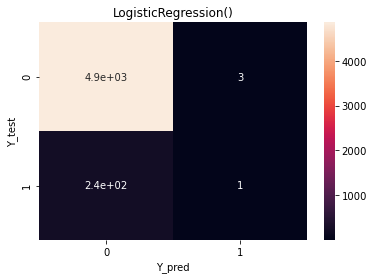

In [37]:
pred_list = [log_reg]

for i in pred_list:
    print("Score : ",i.score(X_test_scaled,y_test))
    y_pred = i.predict(X_test_scaled)
    sns.heatmap(confusion_matrix(y_test,y_pred),annot = True)
    plt.xlabel("Y_pred")
    plt.ylabel("Y_test")
    plt.title(i)
    plt.show()

In [38]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train_scaled, y_train)
y_pred_dt=dt.predict(X_test_scaled)



In [39]:
print(confusion_matrix(y_test,y_pred_dt))

[[4655  205]
 [ 201   43]]


In [40]:
print(metrics.accuracy_score(y_test,y_pred_dt))

0.9204545454545454


In [41]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train_scaled, y_train)
y_pred_rfc=rfc.predict(X_test_scaled)



In [42]:
print(confusion_matrix(y_test,y_pred_rfc))

[[4853    7]
 [ 240    4]]


In [43]:
print(metrics.accuracy_score(y_test,y_pred_rfc))

0.9516065830721003


In [44]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [45]:
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 40)

In [46]:
def grid_search(model,folds,params,scoring):
    grid_search = GridSearchCV(model,
                                cv=folds, 
                                param_grid=params, 
                                scoring=scoring, 
                                n_jobs=-1, verbose=1)
    return grid_search

In [47]:
def print_best_score_params(model):
    print("Best Score: ", model.best_score_)
    print("Best Hyperparameters: ", model.best_params_)

In [48]:
log_reg = LogisticRegression()
log_params = {'C': [0.01, 1, 10], 
          'penalty': ['l1', 'l2'],
          'solver': ['liblinear','newton-cg','saga']
         }
grid_search_log = grid_search(log_reg, folds, log_params, scoring=None)
grid_search_log.fit(X_train_scaled, y_train)
print_best_score_params(grid_search_log)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.0s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   22.7s finished


Best Score:  0.9583932070542129
Best Hyperparameters:  {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


In [49]:
dtc= DecisionTreeClassifier(random_state=40)
dtc_params = {
    'max_depth': [5,10,20,30],
    'min_samples_leaf': [5,10,20,30]
}
grid_search_dtc = grid_search(dtc, folds, dtc_params, scoring='roc_auc_ovr')
grid_search_dtc.fit(X_train_scaled, y_train)
print_best_score_params(grid_search_dtc)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.4s


Best Score:  0.8633707196785189
Best Hyperparameters:  {'max_depth': 5, 'min_samples_leaf': 20}


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    1.8s finished


In [50]:
rfc = RandomForestClassifier(random_state=40, n_jobs = -1,oob_score=True)
rfc_params = {'max_depth': [10,20,30,40],
          'min_samples_leaf': [5,10,15,20,30],
          'n_estimators': [100,200,500,700]
        }
grid_search_rfc = grid_search(rfc, folds, rfc_params, scoring='roc_auc_ovr')
grid_search_rfc.fit(X_train_scaled, y_train)
print('OOB SCORE :',grid_search_rfc.best_estimator_.oob_score_)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   32.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  7.2min finished


OOB SCORE : 0.9583932070542129


In [54]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [55]:
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32)

Epoch 1/50
479/479 [==============================] - 2s 2ms/step - loss: 0.1910 - accuracy: 0.9565
Epoch 2/50
479/479 [==============================] - 1s 2ms/step - loss: 0.1406 - accuracy: 0.9586
Epoch 3/50
479/479 [==============================] - 1s 2ms/step - loss: 0.1345 - accuracy: 0.9585
Epoch 4/50
479/479 [==============================] - 1s 2ms/step - loss: 0.1331 - accuracy: 0.9583
Epoch 5/50
479/479 [==============================] - 1s 3ms/step - loss: 0.1333 - accuracy: 0.9586
Epoch 6/50
479/479 [==============================] - 1s 3ms/step - loss: 0.1321 - accuracy: 0.9586
Epoch 7/50
479/479 [==============================] - 1s 2ms/step - loss: 0.1322 - accuracy: 0.9584
Epoch 8/50
479/479 [==============================] - 1s 2ms/step - loss: 0.1316 - accuracy: 0.9585
Epoch 9/50
479/479 [==============================] - 1s 2ms/step - loss: 0.1309 - accuracy: 0.9585
Epoch 10/50
479/479 [==============================] - 1s 3ms/step - loss: 0.1306 - accuracy: 0.9583

In [56]:
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print('Test accuracy:', test_acc)

160/160 [==============================] - 1s 2ms/step - loss: 0.1476 - accuracy: 0.9520
Test accuracy: 0.9519984126091003
